#      GENERATE A CHANNEL MAP and SPECTRUM WITH RESPECTIVE VALUE OF SIGMA



In [13]:
# Import the necessary libraries
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Circle
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from spectral_cube import SpectralCube
from astropy.wcs.utils import skycoord_to_pixel

In [20]:
## Principals information of the CUBE

file = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/CORRECT/CF+/CF+_N159_sci_VELAXIS_inK_SPECT_SPAT_RES.fits'
#file = 
# Read the data cubes
cube = SpectralCube.read(file)
header = cube.header
wcs = cube.wcs.celestial
print(repr(header))

BEAM1 = 29.0 * u.arcsec  # Beam size of the CF+ data
BEAM2 = 19.0 * u.arcsec  # Beam size of the C+ data

# Define the center coordinates of the region
coord = SkyCoord("05h39m36.675s", "-69d46m00.260s", frame='icrs')

# Define the size of the region to mask (in arcseconds)
width = 90 * u.arcsec
height = 110 * u.arcsec  # Width and height in arcseconds

# Define the velocity channel to plot
VEL_channel = 236.0 * u.km / u.s  # Velocity channel to plot

SIGMA = 0.00184 *u.K  # Value of sigma in K for CF+ (rms noise level)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3                                                  
NAXIS1  =                   70                                                  
NAXIS2  =                   60                                                  
NAXIS3  =                  729                                                  
BMAJ    = 0.004444444444444444                                                  
BMIN    = 0.004444444444444444                                                  
BPA     =                  0.0                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = 'N159-13CII'                                                          
BUNIT   = 'K       '           / Brightness unit in Jy/beam                     
ALTRVAL =   5.990705566226E+

In [21]:
# Define position to extract the spectrum (in RA and DEC)
coord = SkyCoord('05h39m36.5s', '-69d45m35.0s', frame='icrs') # used on proposal APEX

# RA y Dec en formato sexagesimal (HH:MM:SS, DD:MM:SS)
ra_str = coord.ra.to_string(unit=u.hour, sep=':', precision=3, pad=True)   
dec_str = coord.dec.to_string(unit=u.deg, sep=':', precision=3, alwayssign=True, pad=True) 
print('Coordinates to extract the spectrum (ICRS):', ra_str, dec_str)

# Transform to pixel coordinates
x1, y1 = wcs.world_to_pixel(coord)
# Rounding and converting to integers
pix_x, pix_y = int(np.rint(x1)), int(np.rint(y1))
print(f'Pixel coordinates rounded (from {file}): x={pix_x}, y={pix_y}')

Coordinates to extract the spectrum (ICRS): 05:39:36.500 -69:45:35.000
Pixel coordinates rounded (from C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/CORRECT/CF+/CF+_N159_sci_VELAXIS_inK_SPECT_SPAT_RES.fits): x=44, y=32


In [22]:
# Obtain the spectral axis in km/s
spectral_axis = cube.spectral_axis.to(u.km / u.s)
print(f'Spectral axis (km/s): {spectral_axis}')

# Obtener el índice del canal más cercano a la velocidad deseada
idx_channel = np.argmin(np.abs(spectral_axis - VEL_channel))
print(f'Channel index closest to {VEL_channel}: {idx_channel}')
print(f'Actual velocity of the chosen channel: {spectral_axis[idx_channel]}')

# Check if center pixel is within image bounds
ny, nx = cube.shape[1:]  # Spatial dimensions of the cube
print(f'Image dimensions: {nx} x {ny}')

# Extraer el plano de canal (la imagen 2D) para el canal seleccionado
channel_map = cube[idx_channel, :, :].hdu.data

# Obtener el WCS para el plano 2D (solo espacial)
wcs_2d = wcs.celestial


Spectral axis (km/s): [-1.29000000e+02 -1.28000000e+02 -1.27000000e+02 -1.26000000e+02
 -1.25000000e+02 -1.24000000e+02 -1.23000000e+02 -1.22000000e+02
 -1.21000000e+02 -1.20000000e+02 -1.19000000e+02 -1.18000000e+02
 -1.17000000e+02 -1.16000000e+02 -1.15000000e+02 -1.14000000e+02
 -1.13000000e+02 -1.12000000e+02 -1.11000000e+02 -1.10000000e+02
 -1.09000000e+02 -1.08000000e+02 -1.07000000e+02 -1.06000000e+02
 -1.05000000e+02 -1.04000000e+02 -1.03000000e+02 -1.02000000e+02
 -1.01000000e+02 -1.00000000e+02 -9.90000000e+01 -9.80000000e+01
 -9.70000000e+01 -9.60000000e+01 -9.50000000e+01 -9.40000000e+01
 -9.30000000e+01 -9.20000000e+01 -9.10000000e+01 -9.00000000e+01
 -8.90000000e+01 -8.80000000e+01 -8.70000000e+01 -8.60000000e+01
 -8.50000000e+01 -8.40000000e+01 -8.30000000e+01 -8.20000000e+01
 -8.10000000e+01 -8.00000000e+01 -7.90000000e+01 -7.80000000e+01
 -7.70000000e+01 -7.60000000e+01 -7.50000000e+01 -7.40000000e+01
 -7.30000000e+01 -7.20000000e+01 -7.10000000e+01 -7.00000000e+01
 -6

In [23]:
# Obtain essential information from the cubes
print('--------------------')
print('Información del cubo 1:')
RESTFRQ = cube.header['RESTFRQ'] * u.Hz
UNIT = cube.header['CUNIT3']
CRVAL = cube.header['CRVAL3'] * u.km/u.s
CRPIX = cube.header['CRPIX3']
CDELT = cube.header['CDELT3'] * u.km/u.s
NCHAN = cube.shape[0]
print('RESTFRQ:', RESTFRQ)
print('UNIT:', UNIT)
print('CRVAL:', CRVAL)
print('CRPIX:', CRPIX)
print('CRDELT:', CDELT)
print('NCHAN:', NCHAN)
print('--------------------')

# Obtain speed and frequency axes
index = np.arange(1, NCHAN + 1)
VEL = CRVAL + (index - CRPIX) * CDELT
print('Five first vel:', VEL[:5])
FREQ = cube.with_spectral_unit(u.Hz, rest_value=RESTFRQ).spectral_axis.to(u.GHz)
print('Five first freq:', FREQ[:5])
print('--------------------')


--------------------
Información del cubo 1:
RESTFRQ: 102587476000.0 Hz
UNIT: km s-1
CRVAL: -129.00000000003 km / s
CRPIX: 1.0
CRDELT: 1.0 km / s
NCHAN: 729
--------------------
Five first vel: [-129. -128. -127. -126. -125.] km / s
Five first freq: [102.63161915 102.63127696 102.63093476 102.63059257 102.63025037] GHz
--------------------


In [24]:
# Convert celestial coordinates to pixel coordinates for the region of interest
center_x_pix, center_y_pix = skycoord_to_pixel(coord, wcs, origin=0)

# Convert the width and height from arcsec to pixels
pixel_scale_x = abs(wcs.pixel_scale_matrix[0, 0] * u.deg).to(u.arcsec)
pixel_scale_y = abs(wcs.pixel_scale_matrix[1, 1] * u.deg).to(u.arcsec)
width_pix = width.to(u.arcsec).value / pixel_scale_x.value
height_pix = height.to(u.arcsec).value / pixel_scale_y.value

# Calculate the pixel limits for the zoom
xmin_pix = center_x_pix - width_pix / 2
xmax_pix = center_x_pix + width_pix / 2
ymin_pix = center_y_pix - height_pix / 2
ymax_pix = center_y_pix + height_pix / 2

In [25]:
# Set the x-axis lower limit to RA = 05h40m00s
ra_limit = SkyCoord('05h40m10s', '-69d45m00s', frame='icrs')  # Use same Dec as center for consistency
ra_limit_pix, _ = skycoord_to_pixel(ra_limit, wcs_2d, origin=0)
print(f'Pixel coordinate for RA=05h40m00s: x={ra_limit_pix:.2f}')

Pixel coordinate for RA=05h40m00s: x=11.56


In [11]:
# Convert beam sizes to pixel units (approximate, using WCS pixel scale)
center_pix = skycoord_to_pixel(coord, wcs_2d)
pixel_scale = wcs_2d.pixel_scale_matrix[0, 0] * u.deg  # Pixel scale in degrees/pixel
beam1_radius_pix = (BEAM1.to(u.deg) / pixel_scale).value
beam2_radius_pix = (BEAM2.to(u.deg) / pixel_scale).value

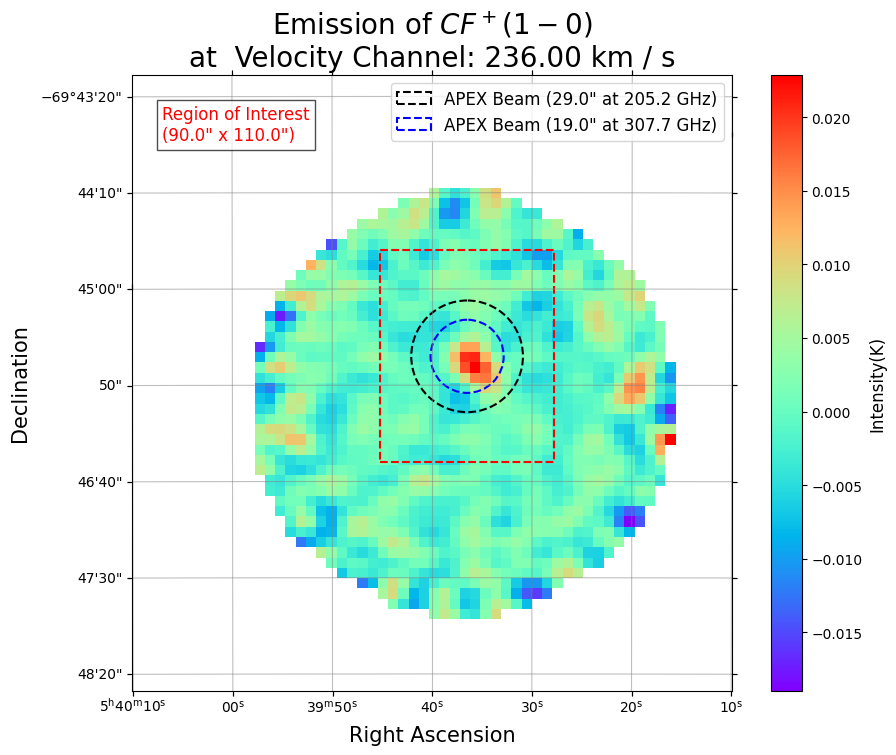

In [ ]:
# Create the figure and axis with WCS projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=wcs_2d)

# Display the channel map
im = ax.imshow(channel_map, origin='lower', cmap='rainbow')

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label(f'Intensity({cube.unit})', fontsize=12)

# Set the title
ax.set_title(r'Emission of $CF^+ (1-0)$' f'\nat  Velocity Channel: {spectral_axis[idx_channel]:.2f}', fontsize=20)

# Configure axis labels and format
lon = ax.coords[0]
lat = ax.coords[1]
lon.set_axislabel('Right Ascension', fontsize=15) 
lat.set_axislabel('Declination', fontsize=15)
lon.set_major_formatter('hh:mm:ss')
lat.set_major_formatter('dd:mm:ss')

# Approach 2: Set specific tick spacing
ra_spacing = 150 * u.arcsec  # Grid lines every 10 arcseconds in RA
dec_spacing = 50 * u.arcsec  # Grid lines every 30 arcseconds in Dec

# Set the tick spacing
lon.set_ticks(spacing=ra_spacing)
lat.set_ticks(spacing=dec_spacing)

3

# Add the rectangle (using pixel coordinates with transData)
rect = mpatches.Rectangle((xmin_pix, ymin_pix), width_pix, height_pix,
                         edgecolor='red', facecolor='none', linewidth=1.5,
                         linestyle='--', transform=ax.transData)
ax.add_patch(rect)

# Add CF+ beam (BEAM1)
beam1_circle = Circle((center_x_pix, center_y_pix), beam1_radius_pix, edgecolor='black', facecolor='none',
                     linewidth=1.5, linestyle='--', transform=ax.transData,
                     label=f'APEX Beam ({BEAM1.value:.1f}" at 205.2 GHz)')
ax.add_patch(beam1_circle)

# Add C+ beam (BEAM2)
beam2_circle = Circle((center_x_pix, center_y_pix), beam2_radius_pix, edgecolor='blue', facecolor='none',
                     linewidth=1.5, linestyle='--', transform=ax.transData,
                     label=f'APEX Beam ({BEAM2.value:.1f}" at 307.7 GHz )')
ax.add_patch(beam2_circle)
plt.legend(loc='upper right', fontsize=12)
# Add a legend for the rectangle
ax.text(0.05, 0.95, f'Region of Interest\n({width.value}" x {height.value}")',
        transform=ax.transAxes, color='red', fontsize=12,
        verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

plt.xlim(ra_limit_pix, nx)  # Set x-axis limit to RA = 05h40m00s to the right edge
# Show the plot
plt.show()

Five first intensity values: [-0.00119561 -0.00151645  0.00319659  0.00084447  0.00016993]
--------------------


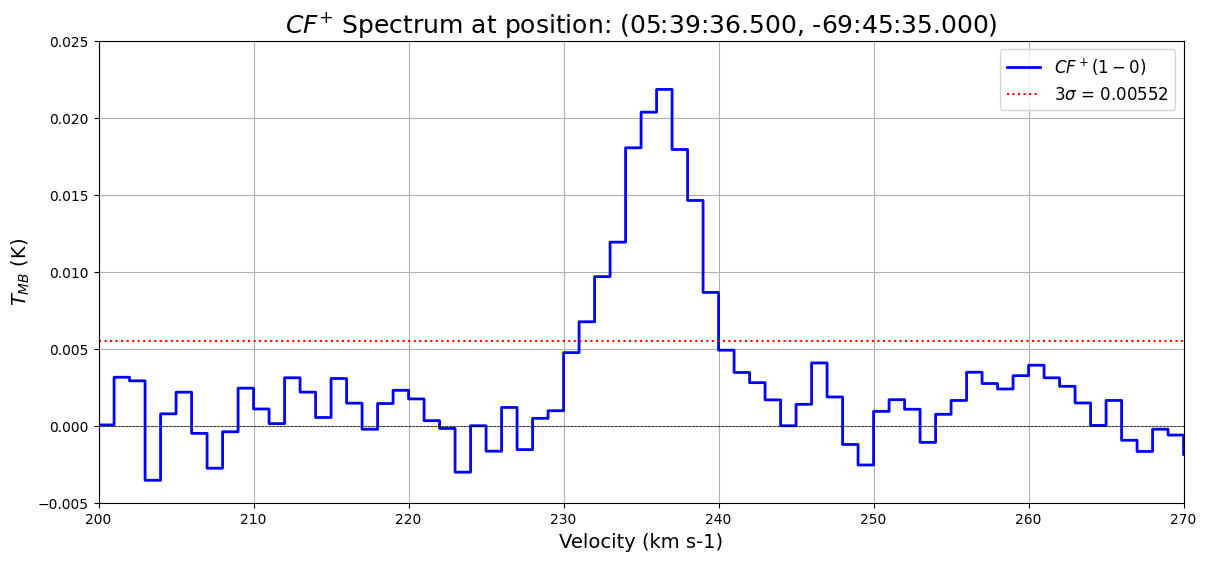

In [37]:
####### OBTAIN THE SPECTRUM #######
SPECT = cube[:, pix_y, pix_x]  # Extract the spectrum at the specified pixel
INTENSITY = SPECT.value  # Intensity values
print('Five first intensity values:', INTENSITY[:5])
print('--------------------')


# View the spectrum
plt.figure(figsize=(14, 6))
plt.step(VEL, INTENSITY, color='blue', lw=2, label=r'$CF^+ (1-0)$')


plt.xlabel(F'Velocity ({UNIT})', fontsize=14)
plt.ylabel(r'$T_{MB} $ ' f'({cube.header['BUNIT']})', fontsize=14)
plt.title(r'$CF^{+}$ ' f'Spectrum at position: ({ra_str}, {dec_str})' , fontsize=18, loc='center')
plt.grid()
plt.xlim(200, 270)
plt.ylim(-0.005, 0.025)

plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axhline(SIGMA.value*3, color='red', linestyle=':', linewidth=1.5, label=r'3$\sigma$' f' = {SIGMA.value*3:.5f}')
plt.legend(fontsize = 12)
plt.show()